# Flight Delays

## Imports and data

In [1]:
import altair as alt
alt.enable_mime_rendering()

In [2]:
flights = alt.load_dataset('flights-5k')

In [3]:
flights.head()

,date,delay,destination,distance,origin
0,2001-01-10 18:20:00,25,HOU,192,SAT
1,2001-01-31 16:45:00,17,OAK,371,SNA
2,2001-02-16 12:07:00,21,SAN,417,SJC
3,2001-02-03 17:00:00,-5,SAN,480,SMF
4,2001-01-02 12:16:00,5,PHX,833,OKC


In [4]:
len(flights)

5000

In [5]:
flights.columns

Index(['date', 'delay', 'destination', 'distance', 'origin'], dtype='object')

## Flight delays and distance

Create a visualization that explores the following question:

> Are longer/shorter flights more or less on time?

Keep in mind that there are 5000 observations here. To answer this question will likely require some sort of aggregation so draw out the correlations.

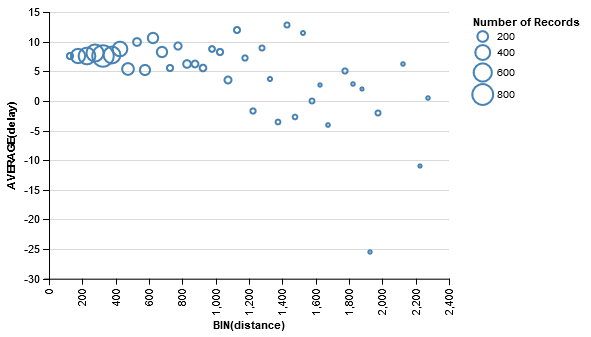

In [6]:
alt.Chart(flights).mark_point().encode(
    alt.X('distance:Q', bin=alt.Bin(maxbins=100)),
    alt.Y('average(delay)'),
    alt.Size('count(*)')
)

In the following markdown cell discuss conclusions from this visualization in complete sentences:

In general, the longer a flight, the less likely there is to be a delay.

## Delays over time

Create a visualization that explores the following question:

> How do average flight delays vary with the day of the week in this dataset?

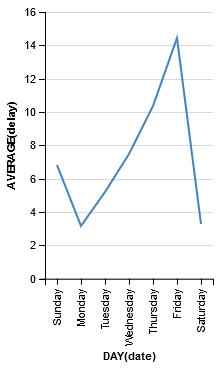

In [7]:
alt.Chart(flights).mark_line().encode(
    alt.X('date:T', timeUnit='day'),
    alt.Y('average(delay)')
)

In the following markdown cell discuss conclusions from this visualization in complete sentences:

Delays on Friday and Thursday are significantly longer than other days of the week.

## Delays by origin and destination

Create a visualization that allows explores the following question:

> Which airports (both origin and detination) have the best and worst average delays?

In creating this visualiztion, there are three variables you need to look at. This means you will need to use at least three encoding channels. Finding the right encoding channels and marks is the challenge here!

In [8]:
import pandas as pd
import numpy as np

new_flights = pd.DataFrame()
new_flights['airports'] =  np.repeat(list(flights.origin.unique()), 2)
new_flights['end'] = np.tile(np.array([0, 1]), len(new_flights)//2)
new_flights['average'] = 0
for i in range(len(new_flights)):
    if new_flights['end'][i] == 0:
        new_flights.at[i, 'average'] = np.average(flights[flights['destination'] == new_flights['airports'][i]]['delay'])
    else:
        new_flights.at[i, 'average'] = np.average(flights[flights['origin'] == new_flights['airports'][i]]['delay'])

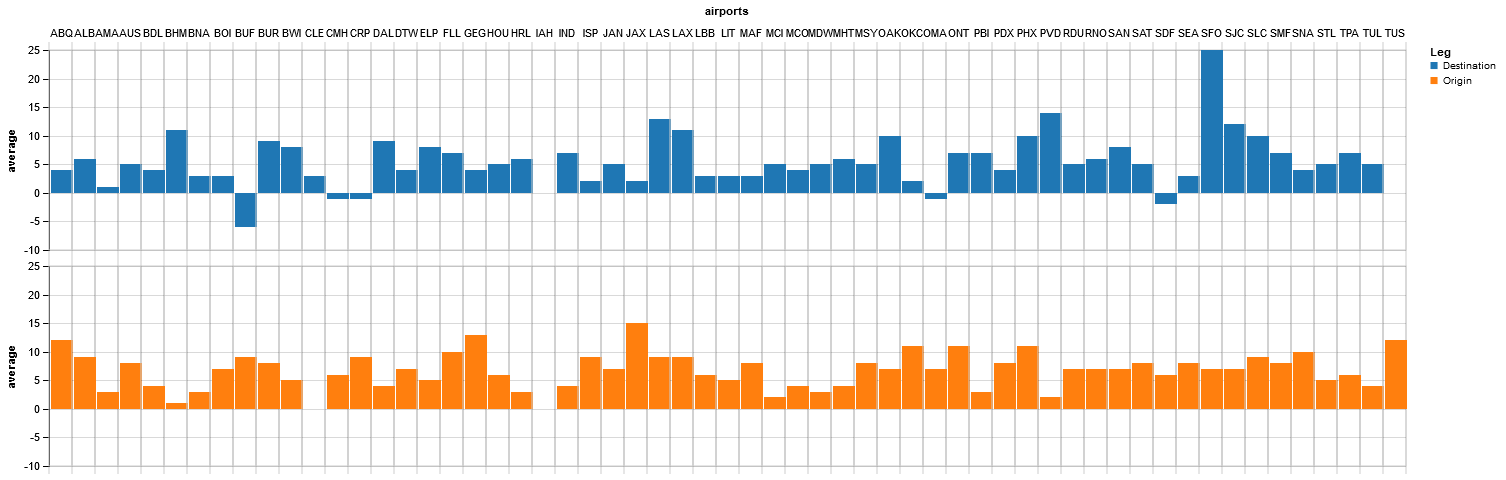

In [22]:
alt.Chart(new_flights).mark_bar(width=10).encode(
    alt.Color('Leg:N'),
    alt.Column('airports:N'),
    alt.Row('Leg:N', axis=False),
    alt.Y('average:Q'),
).configure_scale(bandSize=23
).transform_data(
    calculate=[alt.Formula(
            expr='datum.end == 0 ? "Origin" : "Destination"',
            field='Leg',
        )],
)

In the following markdown cell discuss conclusions from this visualization in complete sentences:

SFO has by far the worst delays when it is the destination while BUF has the least delays.
JAX has the worst delays when it is the origin while BHM has the least delays.